### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef

### Constant Variable

In [2]:
ANAYLZE_DF_LOCATION = './data/analyzed_train.csv'
HIST_JSON_LOCATION = {'xlmr':'./model/xlmr_history.json', 
                      'laser_dnn':'./model/laser_dnn_history.json'}

### Load Dataset

In [3]:
# training and testing data
# train = pd.read_csv('data/train.csv') # 25000
# test = pd.read_csv('data/test.csv')  # 2500

# since I already applied language detection and zero-shot classification on `train.csv` and the results are saved in `analyzed_train.csv`
analyze =  pd.read_csv(ANAYLZE_DF_LOCATION)
analyze.columns = analyze.columns.str.replace(' ', '') # remove blank space in column names for easier manipulation
analyze = analyze.drop(['Unnamed:0'], axis=1) # drop duplicated index column
#analyze.head(30)

### Load Train History of 2 Models

In [4]:
with open(HIST_JSON_LOCATION['xlmr'], 'r') as json_file1:
    xlmr_hist_json = json.load(json_file1)
json_file1.close()

with open(HIST_JSON_LOCATION['laser_dnn'], 'r') as json_file1:
    laser_dnn_hist_json = json.load(json_file1)
json_file1.close()

In [5]:
xlmr_hist_df = pd.read_json(HIST_JSON_LOCATION['xlmr'])
laser_dnn_hist_df = pd.read_json(HIST_JSON_LOCATION['laser_dnn'])

In [6]:
xlmr_hist_df.head(10)

,loss,categorical_accuracy,f1_score,MatthewsCorrelationCoefficient,val_loss,val_categorical_accuracy,val_f1_score,val_MatthewsCorrelationCoefficient
0,1.112197,0.419145,0.410730,"[0.39546329999999996, 0.42041177, 0.4084884]",0.907753,0.530133,0.473817,"[0.40513372000000003, 0.41840968, 0.40099877]"
1,0.826508,0.572807,0.574367,"[0.39531449999999996, 0.42071953, 0.4083155400...",0.721558,0.619733,0.575311,"[0.40513372000000003, 0.41840968, 0.40099877]"
2,0.686411,0.664674,0.665526,"[0.39427137, 0.41976762, 0.41029899999999997]",0.641865,0.696000,0.688649,"[0.40513372000000003, 0.41840968, 0.40099877]"
3,0.614821,0.717291,0.717955,"[0.39448023, 0.4205517, 0.4092941]",0.614055,0.715467,0.709091,"[0.40513372000000003, 0.41840968, 0.40099877]"
4,0.562676,0.748447,0.749065,"[0.39501676, 0.4201878, 0.40915036]",0.570904,0.745600,0.748082,"[0.40513372000000003, 0.41840968, 0.40099877]"
5,0.533188,0.766237,0.767328,"[0.39534426, 0.41973954, 0.4092941]",0.508210,0.774933,0.774986,"[0.40513372000000003, 0.41840968, 0.40099877]"
6,0.491764,0.780309,0.781105,"[0.3947188, 0.42139015, 0.40820026]",0.509829,0.785333,0.783941,"[0.40513372000000003, 0.41840968, 0.40099877]"
7,0.462920,0.799087,0.799785,"[0.39477837, 0.42043972, 0.40912154]",0.506603,0.785067,0.786373,"[0.40513372000000003, 0.41840968, 0.40099877]"
8,0.436781,0.815324,0.816094,"[0.39415202, 0.42032778, 0.40983993]",0.499876,0.796533,0.796273,"[0.40513372000000003, 0.41840968, 0.40099877]"
9,0.423796,0.816594,0.817299,"[0.39632514, 0.41934693, 0.40874752000000003]",0.466431,0.803467,0.803606,"[0.40513372000000003, 0.41840968, 0.40099877]"


In [7]:
xlmr_hist_df.tail(10)

,loss,categorical_accuracy,f1_score,MatthewsCorrelationCoefficient,val_loss,val_categorical_accuracy,val_f1_score,val_MatthewsCorrelationCoefficient
7,0.462920,0.799087,0.799785,"[0.39477837, 0.42043972, 0.40912154]",0.506603,0.785067,0.786373,"[0.40513372000000003, 0.41840968, 0.40099877]"
8,0.436781,0.815324,0.816094,"[0.39415202, 0.42032778, 0.40983993]",0.499876,0.796533,0.796273,"[0.40513372000000003, 0.41840968, 0.40099877]"
9,0.423796,0.816594,0.817299,"[0.39632514, 0.41934693, 0.40874752000000003]",0.466431,0.803467,0.803606,"[0.40513372000000003, 0.41840968, 0.40099877]"
10,0.400330,0.830007,0.830655,"[0.3947486, 0.42043972, 0.40915036]",0.481466,0.812000,0.810417,"[0.40513372000000003, 0.41840968, 0.40099877]"
11,0.411272,0.826854,0.827259,"[0.3944504, 0.42150182, 0.40834436]",0.508299,0.812000,0.810353,"[0.40513372000000003, 0.41840968, 0.40099877]"
12,0.373580,0.845727,0.846158,"[0.39442056000000003, 0.4201318, 0.4097825]",0.464856,0.822133,0.823046,"[0.40513372000000003, 0.41840968, 0.40099877]"
13,0.347502,0.857681,0.858103,"[0.39507627, 0.42049572, 0.40877634]",0.432971,0.831200,0.831954,"[0.40513372000000003, 0.41840968, 0.40099877]"
14,0.331467,0.863987,0.864181,"[0.39504653, 0.42066354, 0.40863234]",0.460036,0.832267,0.831647,"[0.40513372000000003, 0.41840968, 0.40099877]"
15,0.322132,0.868176,0.868304,"[0.39543352, 0.41982365, 0.40912154]",0.468089,0.825867,0.825352,"[0.40513372000000003, 0.41840968, 0.40099877]"
16,0.309123,0.873117,0.873329,"[0.39462936, 0.4202718, 0.40943778000000003]",0.464328,0.833067,0.834124,"[0.40513372000000003, 0.41840968, 0.40099877]"


In [7]:
laser_dnn_hist_df.head(10)

,loss,categorical_accuracy,f1_score,MatthewsCorrelationCoefficient,val_loss,val_categorical_accuracy,val_f1_score,val_MatthewsCorrelationCoefficient,lr
0,1.095238,0.412302,0.401840,"[0.3948882818, 0.4203739166, 0.40908321740000003]",1.089198,0.580267,0.572848,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001
1,1.080939,0.576262,0.570552,"[0.3948882818, 0.4203739166, 0.40908321740000003]",1.067916,0.646400,0.634421,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001
2,1.053586,0.624971,0.614296,"[0.3948882818, 0.4203739166, 0.40908321740000003]",1.032017,0.671200,0.662111,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001
3,1.011526,0.642477,0.632350,"[0.3948882818, 0.4203739166, 0.40908321740000003]",0.979927,0.681067,0.674345,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001
4,0.956205,0.649536,0.641192,"[0.3948882818, 0.4203739166, 0.40908321740000003]",0.919115,0.685067,0.678544,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001
5,0.897140,0.655890,0.648674,"[0.3948882818, 0.4203739166, 0.40908321740000003]",0.859573,0.689867,0.684534,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001
6,0.842017,0.668831,0.662435,"[0.3948882818, 0.4203739166, 0.40908321740000003]",0.808732,0.692000,0.683902,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001
7,0.797331,0.677020,0.671009,"[0.3948882818, 0.4203739166, 0.40908321740000003]",0.766960,0.706933,0.700979,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001
8,0.757398,0.691044,0.686429,"[0.3948882818, 0.4203739166, 0.40908321740000003]",0.731631,0.720533,0.716513,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001
9,0.726082,0.706057,0.701939,"[0.3948882818, 0.4203739166, 0.40908321740000003]",0.702072,0.737067,0.733727,"[0.4051337242, 0.4184096754, 0.4009987712]",0.00001


### Plot Model Performance Metrics

In [20]:
# function to plot model performance 

def plot_model_history(history, measures):
    """
    Plot history for visualization of performance measures in matplotlib.
    
    Parameters:
    ------------
    history : Keras History object
        A History object outputted from model.fit
    measure : str list 
        A list of string of which performance measures to be visualized    
    """
    for measure in measures:
        plt.plot(history[measure])
        plt.plot(history['val_' + measure])
        plt.title('model performance : ' + measure.replace("_", " "))
        plt.ylabel(measure.replace("_", " "))
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

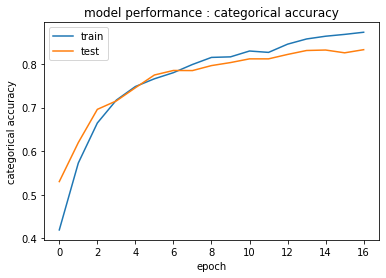

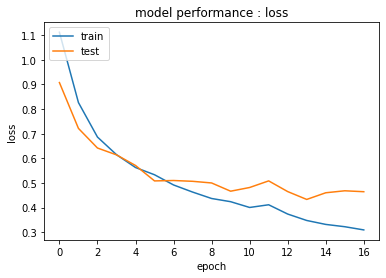

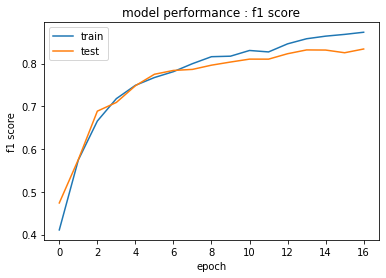

In [21]:
plot_model_history(xlmr_hist_json, 
                   ['categorical_accuracy', 'loss', 'f1_score'])

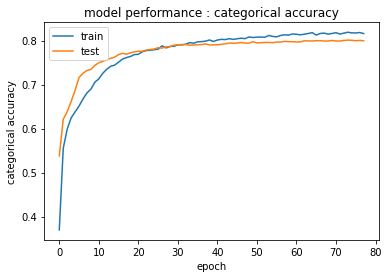

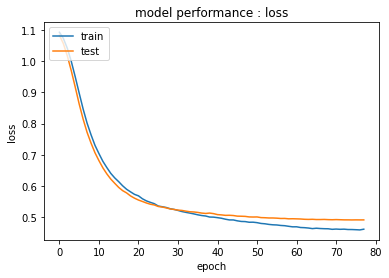

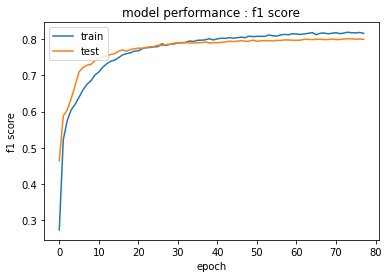

In [49]:
plot_model_history(laser_dnn_hist_json, 
                   ['categorical_accuracy', 'loss', 'f1_score'])

### Baseline : Zero-Shot Classification 

I use `joeddav/xlm-roberta-large-xnli`, which is the version of `xlm-roberta-large` fine-tuned on NLI natural language inference datasets in 15 langauges. `transformers.ZeroShotClassificationPipeline` can only be used with models that have been fine-tuned on NLI tasks. 

(ps. to uncomment multiple lines, just `select all` and `ctrl`+`/`)

In [50]:
# from transformers import pipeline
# classifier = pipeline("zero-shot-classification",
#                       model="joeddav/xlm-roberta-large-xnli")

# def baseline(sequence_to_classify):
#     """
#     Use XLM-R to make zero-shot sentiment analysis as a baseline model.
    
#     Parameters
#     ----------
#     sequence_to_classify : str
#         A string to feed into baseline model to make prediction
    
#     Returns
#     ----------
#     predicted_label : str
#         A string of which sentiment (positive, negative, neutral) is predicted by the baseline model
#     """
#     candidate_labels = ["positive", "negative", "neutral"]
#     result = classifier(sequence_to_classify, candidate_labels)
#     result_label_list = result['labels']
#     score_argmax_index = np.array(result['scores']).argmax()
#     predicted_label = result_label_list[score_argmax_index]
#     return predicted_label

# # baseline model makes zero-shot sentiment prediction on training set
# df["predicted_label"] = df.content.apply(lambda row: baseline(row))

#  use accuracy_score, f1_score, matthews_corrcoef from sklearn to evaluate baseline model performance
y_true = analyze.sentiment.values
y_pred_zero_shot = analyze.predicted_label.values

print('accuracy :',accuracy_score(y_true, y_pred_zero_shot))
print('F1 :',f1_score(y_true, y_pred_zero_shot, average='weighted'))
print('MCC :',matthews_corrcoef(y_true, y_pred_zero_shot))

accuracy : 0.52952
F1 : 0.4567419027211373
MCC : 0.3399870617694973


### Model Error Analysis